<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/horse_and_human_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-03-27 18:06:26--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   107MB/s    in 1.3s    

2024-03-27 18:06:28 (107 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [21]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-03-27 18:10:19--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  71.5MB/s    in 0.2s    

2024-03-27 18:10:19 (71.5 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

In [15]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [22]:
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [23]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [24]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse32-0.png', 'horse08-6.png', 'horse45-0.png', 'horse37-9.png', 'horse36-3.png', 'horse06-6.png', 'horse40-6.png', 'horse22-7.png', 'horse44-2.png', 'horse28-1.png']
TRAIN SET HUMANS: ['human08-20.png', 'human12-17.png', 'human05-16.png', 'human08-02.png', 'human03-24.png', 'human09-05.png', 'human03-18.png', 'human13-25.png', 'human10-00.png', 'human04-15.png']
VAL SET HORSES: ['horse2-596.png', 'horse4-188.png', 'horse5-002.png', 'horse2-383.png', 'horse4-468.png', 'horse1-335.png', 'horse2-201.png', 'horse1-127.png', 'horse5-504.png', 'horse4-302.png']
VAL SET HUMANS: ['valhuman03-04.png', 'valhuman01-03.png', 'valhuman02-18.png', 'valhuman01-08.png', 'valhuman05-09.png', 'valhuman01-13.png', 'valhuman05-19.png', 'valhuman05-22.png', 'valhuman05-21.png', 'valhuman02-05.png']


In [25]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

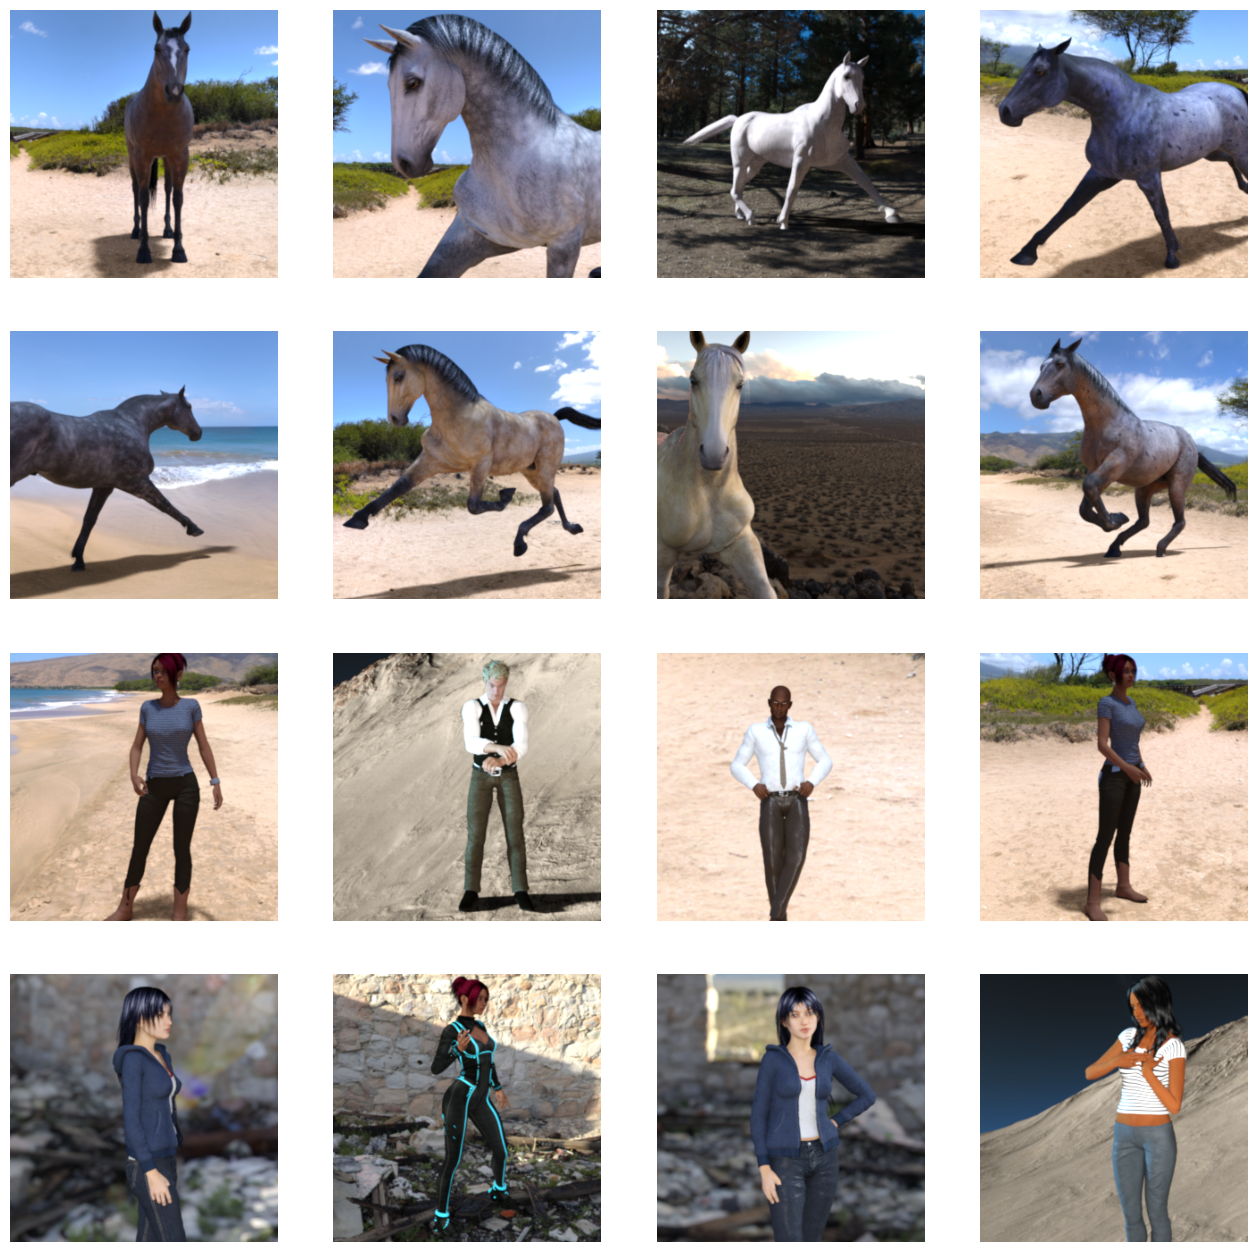

In [19]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 35, 35, 64)       

In [29]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [26]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/15
8/8 - 21s - loss: 0.8034 - accuracy: 0.5473 - val_loss: 0.6917 - val_accuracy: 0.5000 - 21s/epoch - 3s/step
Epoch 2/15
8/8 - 9s - loss: 0.6895 - accuracy: 0.5373 - val_loss: 0.6857 - val_accuracy: 0.5391 - 9s/epoch - 1s/step
Epoch 3/15
8/8 - 9s - loss: 0.6980 - accuracy: 0.6029 - val_loss: 0.6838 - val_accuracy: 0.6406 - 9s/epoch - 1s/step
Epoch 4/15
8/8 - 12s - loss: 0.6554 - accuracy: 0.6073 - val_loss: 0.4876 - val_accuracy: 0.8516 - 12s/epoch - 1s/step
Epoch 5/15
8/8 - 9s - loss: 0.5977 - accuracy: 0.6874 - val_loss: 0.5218 - val_accuracy: 0.7422 - 9s/epoch - 1s/step
Epoch 6/15
8/8 - 9s - loss: 0.4682 - accuracy: 0.8066 - val_loss: 0.2542 - val_accuracy: 0.9062 - 9s/epoch - 1s/step
Epoch 7/15
8/8 - 10s - loss: 0.3332 - accuracy: 0.8487 - val_loss: 0.8962 - val_accuracy: 0.7969 - 10s/epoch - 1s/step
Epoch 8/15
8/8 - 9s - loss: 0.2479 - accuracy: 0.9099 - val_loss: 0.7350 - val_accuracy: 0.8555 - 9s/epoch - 1s/step
Epoch 9/15
8/8 - 10s - loss: 0.2439 - accuracy: 0.8966 - v

In [35]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = f'/content/{fn}'
  img = image.load_img(path,target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if(classes[0] > 0.5):
    print(f'{fn} is a human')
  else:
    print(f'{fn} is a horse')

Saving mulher.jpg to mulher.jpg
1/1 [==============================] - 0s 23ms/step
[1.]
mulher.jpg is a human


1/1 [==============================] - 0s 104ms/step


<ipython-input-36-3501e75cf878>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-36-3501e75cf878>:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


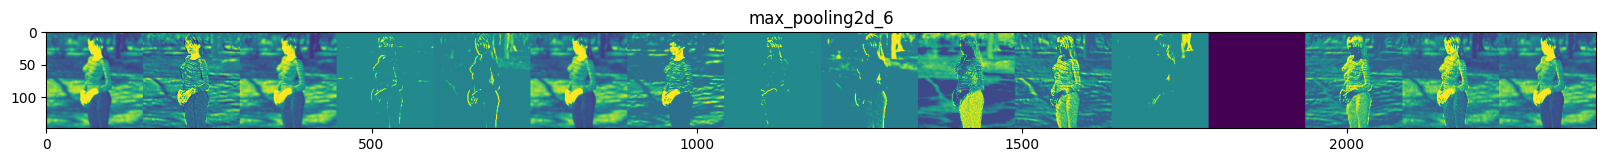

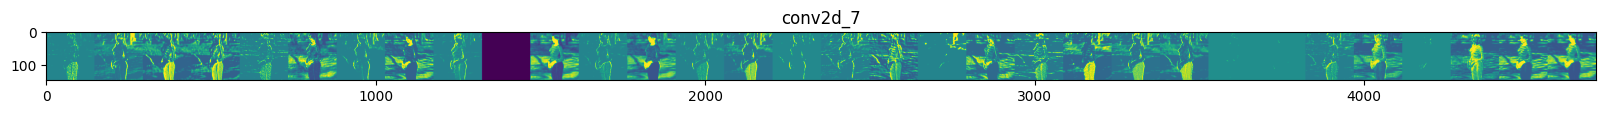

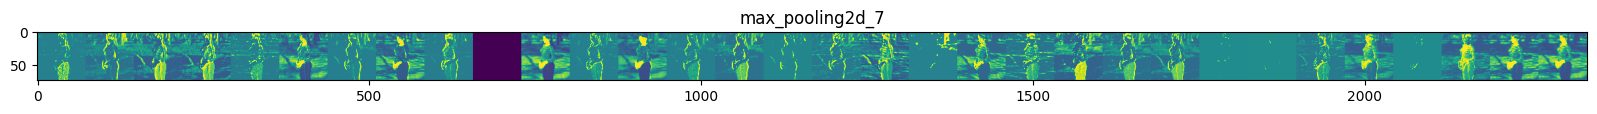

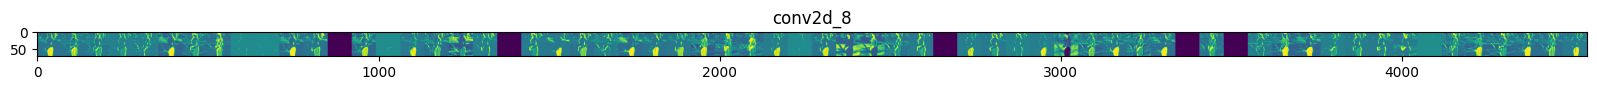

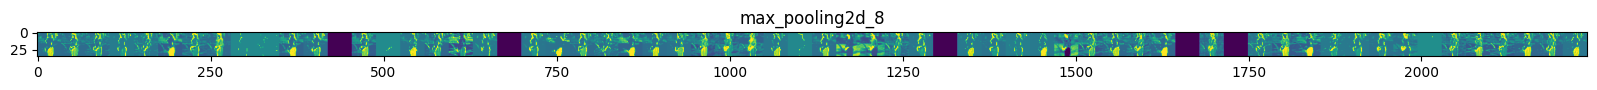

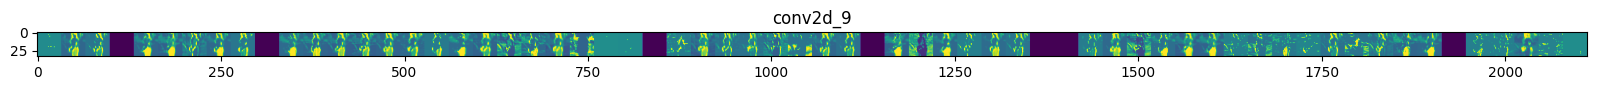

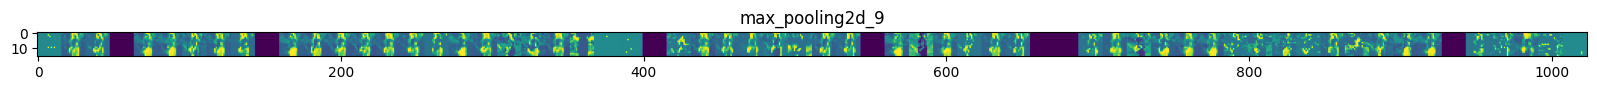

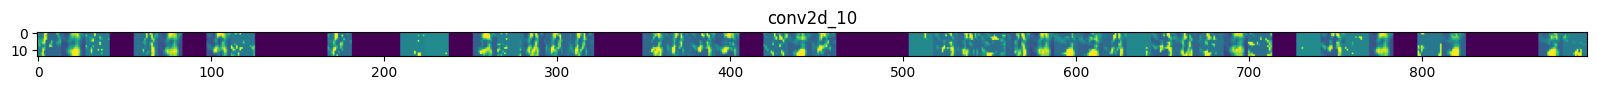

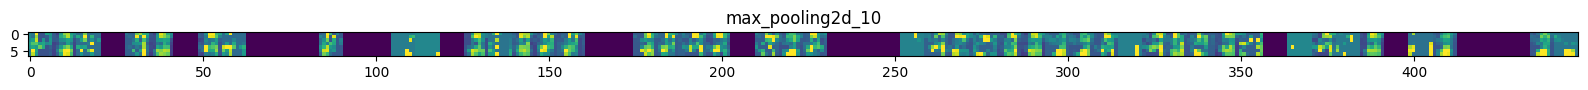

In [36]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]

    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')